<a href="https://colab.research.google.com/github/alex-smith-uwec/NLP_Spring2025/blob/main/GenderBias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Be patient...this will take some time to download..say 10 to 15 minutes!
import gensim.downloader as api
model = api.load('word2vec-google-news-300')


[==================================================] 100.0% 1662.8/1662.8MB downloaded


### Ideas from  https://youtu.be/UwAvyACOrWs?si=wgNscaEVnSErBpGO

In [ ]:
e1=model["he"]-model["she"]

e2=model["him"]-model["her"]

e3=model["cat"]-model["dog"]


In [ ]:
import numpy as np

def angle_between(v1, v2):
    v1_normalized = v1 / np.linalg.norm(v1)
    v2_normalized = v2 / np.linalg.norm(v2)

    # Calculate the dot product of the normalized vectors
    dot_product = np.dot(v1_normalized, v2_normalized)

    # Calculate the angle in radians
    angle_radians = np.arccos(np.clip(dot_product, -1.0, 1.0))

    # Convert the angle to degrees
    angle_degrees = np.degrees(angle_radians)

    # Ensure the angle is acute by taking its minimum with 180 - angle
    acute_angle = min(angle_degrees, 180 - angle_degrees)

    return acute_angle



In [ ]:
print(f'angle between e1 and e2 is {angle_between(e1,e2)}')
print(f'angle between e1 and e3 is {angle_between(e1,e3)}')
print(f'angle between e2 and e3 is {angle_between(e2,e3)}')

angle between e1 and e2 is 39.10764638761158
angle between e1 and e3 is 89.47748776826298
angle between e2 and e3 is 86.418432392022


In [ ]:
stereotype_pairs = [('carpentry', 'sewing'),('physician', 'nurse'),('surgeon', 'nurse'),('doctor', 'nurse')]
appropriate_pairs = [('man', 'woman'),('brother', 'sister'),('father', 'mother'),('he', 'she'),('him', 'her'),('boy', 'girl')]
random_pairs = [('dog', 'cat'),('carpet','leg'),('hot','cold')]


In [ ]:
angle_between(model["hot"]-model["cold"],model["hot"]-model["cold"])

0.0

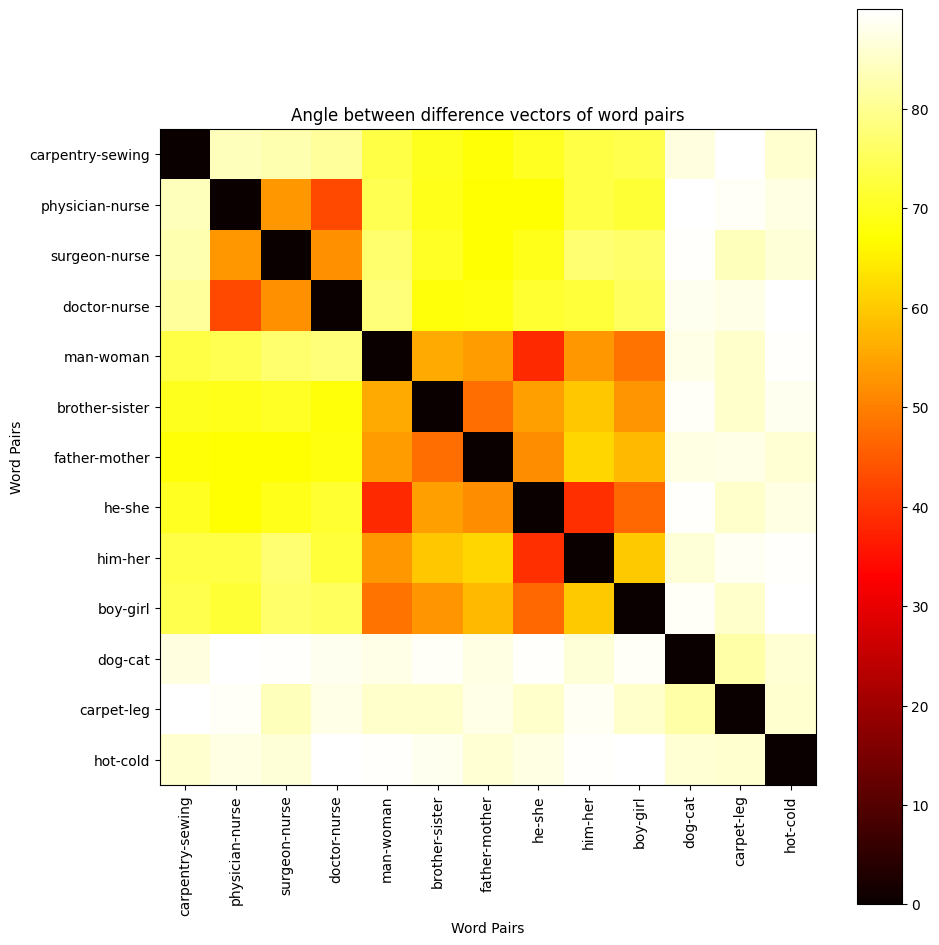

In [ ]:
import matplotlib.pyplot as plt
# Combine all pairs for processing
all_pairs = stereotype_pairs + appropriate_pairs + random_pairs

# Calculate the difference vectors
difference_vectors = {pair: model[pair[0]] - model[pair[1]] for pair in all_pairs}

# Calculate the angles between all pairs of difference vectors
for i, pair1 in enumerate(all_pairs):
    for j, pair2 in enumerate(all_pairs):
        if i == j:
            angles[i, j] = 0  # Angle between a vector and itself is 0 degrees
        else:
            angle = angle_between(difference_vectors[pair1], difference_vectors[pair2])
            angles[i, j] = angle

# Labels for the heat map
pair_labels = [f'{pair[0]}-{pair[1]}' for pair in all_pairs]

# Plotting the heat map with labels
fig, ax = plt.subplots(figsize=(10, 10))
heatmap = ax.imshow(angles, cmap='hot', interpolation='nearest')

# Add color bar with adjusted aspect
cbar = fig.colorbar(heatmap, aspect=20)

# Add labels
ax.set_xticks(np.arange(len(pair_labels)))
ax.set_yticks(np.arange(len(pair_labels)))
ax.set_xticklabels(pair_labels, rotation=90)
ax.set_yticklabels(pair_labels)

ax.set_title('Angle between difference vectors of word pairs')
ax.set_xlabel('Word Pairs')
ax.set_ylabel('Word Pairs')

# Improving layout for better readability
plt.tight_layout()

plt.show()

### ideas from paper **Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings**


In [ ]:
from sklearn.decomposition import PCA  # PCA implementation
import numpy as np

In [ ]:
##computer_programmer is to man as x is to woman
result_vector = model['computer_programmer'] - model['man'] + model['woman']

# Find the most similar word(s)
most_similar = model.similar_by_vector(result_vector, topn=10)
most_similar

[('computer_programmer', 0.910581111907959),
 ('homemaker', 0.5771316289901733),
 ('schoolteacher', 0.5500192046165466),
 ('graphic_designer', 0.5464698672294617),
 ('mechanical_engineer', 0.539836585521698),
 ('electrical_engineer', 0.5337055325508118),
 ('housewife', 0.5274525284767151),
 ('programmer', 0.5096209049224854),
 ('businesswoman', 0.5029540657997131),
 ('keypunch_operator', 0.4974639415740967)]

In [ ]:
##man is to doctor  as woman is to x
result_vector = model['woman'] - model['man'] + model['doctor']

# Find the most similar word(s)
most_similar = model.similar_by_vector(result_vector, topn=10)
most_similar

[('doctor', 0.883492112159729),
 ('gynecologist', 0.7276507616043091),
 ('nurse', 0.6698512434959412),
 ('physician', 0.6674120426177979),
 ('doctors', 0.664949357509613),
 ('pediatrician', 0.6398378014564514),
 ('nurse_practitioner', 0.6237460374832153),
 ('obstetrician', 0.6188926696777344),
 ('midwife', 0.6041983366012573),
 ('dentist', 0.599966287612915)]

In [ ]:
# Define your word pairs representing the dimension of interest
word_pairs = [
    ('he', 'she'),
    ('his', 'her'),
    ('man', 'woman'),
    ('John','Mary'),
    ('himself','herself'),
    ('son','daughter'),
    ('father','mother'),
    ('guy','gal'),
    ('boy','girl'),
    ('male','female')
]

# Calculate vector differences for each pair
vector_differences = np.array([model[w1] - model[w2] for w1, w2 in word_pairs])

# Apply PCA to these differences
pca = PCA(n_components=1)  # We're interested in the first principal component
pca.fit(vector_differences)

# The first principal component
gender_subspace = pca.components_[0]


In [ ]:
#gender_subspace
np.linalg.norm(gender_subspace)

1.0

In [ ]:
np.dot(model["computer_programmer"],gender_subspace)

0.10721914

In [ ]:
words_of_interest = ['doctor', 'nurse', 'engineer', 'teacher', 'philosopher','mathematician',
                     'therapist', 'sociologist', 'psychologist','secretary','typist','receptionist',
                     'astronaut','plumber','mechanic','teacher','librarian','babysitter','physician','physicist',
                     'chemist','clerk','assasin','assistant_professor','pope','archbishop','ambassador',
                     'policeman','policewoman','cop','dean','maid','veterinarian','housewife','scientist',
                     'computer_programmer','engineer','nun','scholar','mobster']

# Calculate bias or similarity score for each word
word_scores = {}
for word in words_of_interest:
    word_vector = model[word]  # Get the vector for each word
    bias_score = np.dot(word_vector, gender_subspace)  # Calculate the dot product
    word_scores[word] = bias_score

# Sort words by their bias score in descending order
sorted_word_scores = {word: score for word, score in sorted(word_scores.items(), key=lambda item: item[1], reverse=False)}

# Print each word with its corresponding score
for word, score in sorted_word_scores.items():
    print(f"{word}: {score}")

housewife: -0.6613065004348755
chemist: -0.2269805669784546
librarian: -0.1803925484418869
maid: -0.15699322521686554
engineer: -0.1320558786392212
typist: -0.13031186163425446
receptionist: -0.04785697162151337
scientist: -0.038470227271318436
clerk: -0.02898036129772663
secretary: -0.018657412379980087
policewoman: -0.004914897494018078
nurse: 0.005768473260104656
assasin: 0.006462178658694029
astronaut: 0.009242439642548561
therapist: 0.04579967260360718
plumber: 0.04746105521917343
sociologist: 0.047601368278265
physicist: 0.05675961822271347
assistant_professor: 0.06269674003124237
computer_programmer: 0.1072191372513771
ambassador: 0.10926167666912079
veterinarian: 0.11100904643535614
mechanic: 0.11287397891283035
babysitter: 0.11667690426111221
dean: 0.1596018671989441
scholar: 0.18392446637153625
teacher: 0.20613127946853638
nun: 0.2314428836107254
mobster: 0.25538840889930725
cop: 0.2626468539237976
mathematician: 0.2722663879394531
policeman: 0.273216187953949
physician: 0.28

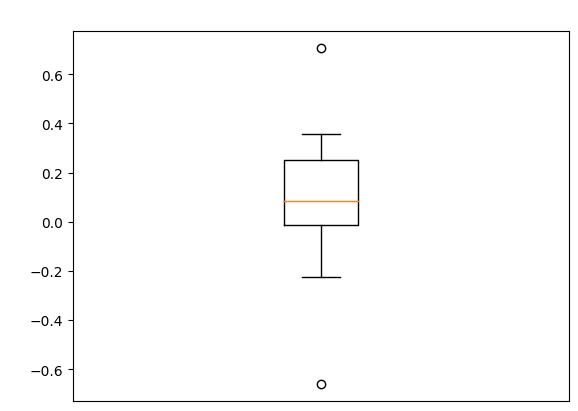

In [ ]:
import matplotlib.pyplot as plt


scores = [values for values in word_scores.values()]


plt.boxplot(scores)
plt.ylabel(' ')  # Optional: Adjust as needed
plt.title(' ')  # Optional: Adjust as needed

# Remove x-axis labels
plt.xticks([])

plt.show()


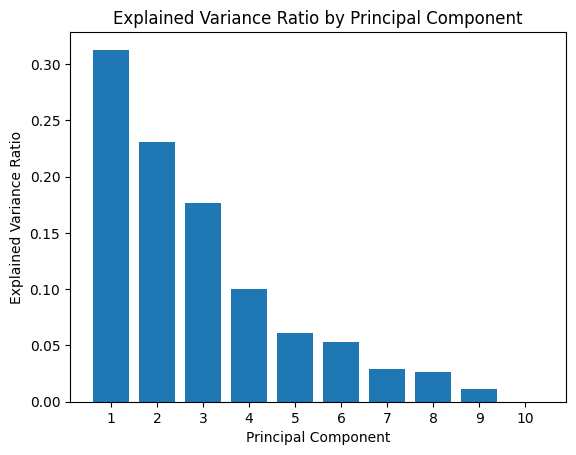

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming vector_differences and word_pairs are defined
# Apply PCA to these differences, considering two components
pca = PCA(n_components=len(word_pairs))  # Adjusted to compute two principal components
pca.fit(vector_differences)

# Extracting the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting a histogram of the explained variance ratios
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1, step=1))
plt.show()




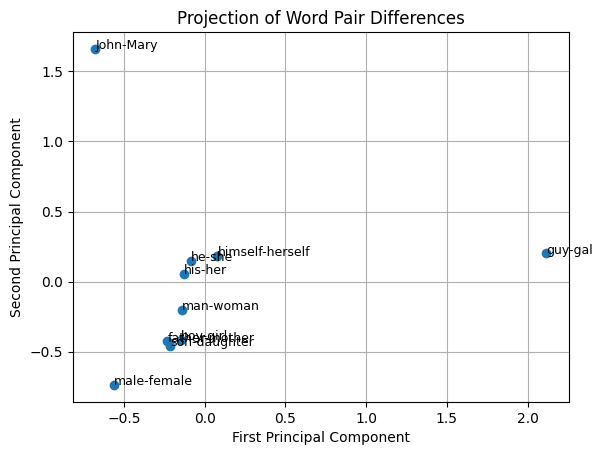

In [ ]:
# Extracting the first two principal components
first_principal_component = pca.components_[0]
second_principal_component = pca.components_[1]

# Projecting the vector differences onto the first two principal components
projected_points = pca.transform(vector_differences)

# Plotting the projected points
plt.scatter(projected_points[:, 0], projected_points[:, 1])
for i, word_pair in enumerate(word_pairs):
    plt.text(projected_points[i, 0], projected_points[i, 1], f'{word_pair[0]}-{word_pair[1]}', fontsize=9)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Projection of Word Pair Differences')
plt.grid(True)
plt.show()